# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fs
import functions_vectorized as fsv
import timeit
import random
import scipy.spatial.distance

def make_graphs(data_size, arrs_time, vecs_time, x_label):
    plt.plot(data_size, vecs_time, label=u'Векторизированная')
    plt.plot(data_size, arrs_time, label=u'Невекторизованная')
    plt.ylabel(u"Время (ms)")
    plt.xlabel(x_label)
    plt.grid()
    plt.legend()
    plt.show()      

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

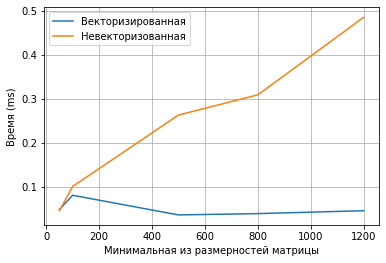

In [17]:
def test1():
    t = [(50, 50), (100, 200), (500, 500), (800, 1000), (1200, 1200)]
    x = np.array([min(i) for i in t])
    y1, y2 = np.zeros(len(t)), np.zeros(len(t))
    for i in range(len(t)):
        ntabs = [np.random.randint(-3, 3, size=t[i]) for j in range(3)]
        tabs = [j.tolist() for j in ntabs]
        for j in range(3):
            w = ntabs[j].tolist()
            y1[i] += timeit.timeit(stmt=lambda: fs.multiply_diagonal(w), globals= globals(), number=5) / 5 * 1000
            y2[i] += timeit.timeit(stmt=lambda: fsv.multiply_diagonal_v(ntabs[j]), globals= globals(), number=5) / 5 * 1000
        y1[i] /= 3
        y2[i] /= 3
    make_graphs(x, y1, y2, u"Минимальная из размерностей матрицы")

    
test1()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


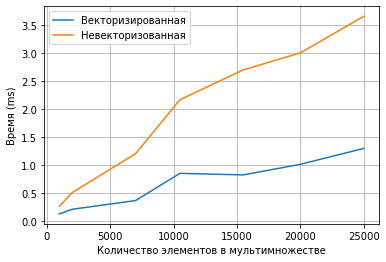

In [17]:
def test2():
    t = [1000, 2000, 7000, 10500, 15500, 20000, 25000]
    x = np.array(t)
    y1, y2 = np.zeros(len(t)), np.zeros(len(t))
    for i in range(len(t)):
        nmm = [[np.random.randint(-3, 3, size=t[i]), np.random.randint(-3, 3, size=t[i])] for j in range(3)]
        mm = [[j[0].tolist(), j[1].tolist()] for j in nmm]
        for j in range(3):
            y1[i] += timeit.timeit(stmt=lambda: fs.equal_multiset(mm[j][0], mm[j][1]), globals= globals(), number=5) / 5 * 1000
            y2[i] += timeit.timeit(stmt=lambda: fsv.equal_multiset_v(nmm[j][0], nmm[j][1]), globals= globals(), number=5) / 5 * 1000
        y1[i] /= 3
        y2[i] /= 3
    make_graphs(x, y1, y2, u"Количество элементов в мультимножестве")

    
test2()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

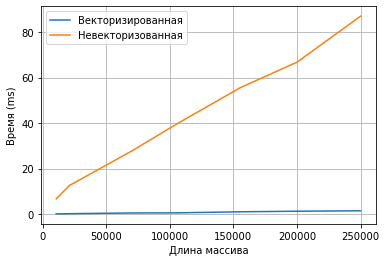

In [6]:
def test3():
    t = [10560, 20780, 70000, 105000, 155520, 200000, 250000]
    x = np.array(t)
    y1, y2 = np.zeros(len(t)), np.zeros(len(t))
    for i in range(len(t)):
        nrow = [np.random.randint(0, 10, size=t[i]) for j in range(3)]
        row = [j.tolist() for j in nrow]
        for j in range(3):
            y1[i] += timeit.timeit(stmt=lambda: fs.max_before_zero(row[j]), globals=globals(), number=5) / 5 * 1000
            y2[i] += timeit.timeit(stmt=lambda: fsv.max_before_zero_v(nrow[j]), globals=globals(), number=5) / 5 * 1000
        y1[i] /= 3
        y2[i] /= 3
    make_graphs(x, y1, y2, u"Длина массива")


test3()

 
 
* __Задача 4__ : Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


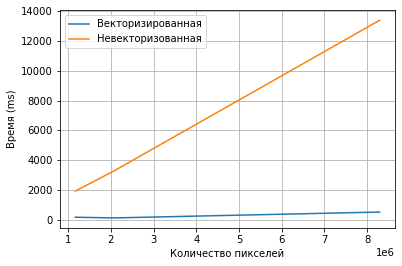

In [20]:
import imageio as iio
import numpy
def test4():
    vecs = [iio.imread(f'i{i}.png') for i in range(3)]
    arrs = [vec.tolist() for vec in vecs]
    data_size = [len(vecs[i]) * len(vecs[i][0]) for i in range(len(vecs))]
    arrs_time, vecs_time = numpy.zeros(len(vecs)), numpy.zeros(len(vecs))
    arr_koefs = [0.299, 0.587, 0.114]
    vec_koefs = np.array(arr_koefs)
    for i in range(len(vecs)):
        arrs_time[i] = timeit.timeit(stmt=lambda: fs.convert_image(arrs[i], arr_koefs), globals=globals(),
                                     number=1) * 1000
        vecs_time[i] = timeit.timeit(stmt=lambda: fsv.convert_image(vecs[i], vec_koefs), globals=globals(),
                                     number=1) * 1000
        iio.imwrite(f'arrs{i}.png', np.array(fs.convert_image(arrs[i], arr_koefs), np.uint8))
        iio.imwrite(f'vecs{i}.png', fsv.convert_image(vecs[i], vec_koefs))
    make_graphs(data_size, arrs_time, vecs_time, u"Количество пикселей")


test4()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

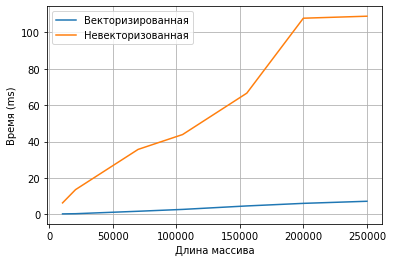

In [10]:
def test5():
    t = [10560, 20780, 70000, 105000, 155520, 200000, 250000]
    x = np.array(t)
    y1, y2 = np.zeros(len(t)), np.zeros(len(t))
    for i in range(len(t)):
        nrow = [np.random.randint(0, 10, size=t[i]) for j in range(3)]
        row = [j.tolist() for j in nrow]
        for j in range(3):
            y1[i] += timeit.timeit(stmt=lambda: fs.run_length_encoding(row[j]), globals=globals(), number=5) / 5 * 1000
            y2[i] += timeit.timeit(stmt=lambda: fsv.run_length_encoding(nrow[j]), globals=globals(), number=5) / 5 * 1000
        y1[i] /= 3
        y2[i] /= 3
    make_graphs(x, y1, y2, u"Длина массива")


test5()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
def test6():
    t = t = [(50, 50), (100, 200), (500, 500), (800, 1000), (1200, 1200)]
    x = np.array(t)
    y1, y2, y3 = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
    for i in range(len(t)):
        nrow1, nrow2 = [np.random.randint(0, 10, size=t[i]) for j in range(3)], [np.random.randint(0, 10, size=t[i]) for j in range(3)]
        row1, row2 = [j.tolist() for j in nrow1], [j.tolist() for j in nrow2]
        for j in range(3):
            y1[i] += timeit.timeit(stmt=lambda: fs.pair_distance(row1[j], row2[j]), globals=globals(), number=5) / 5 * 1000
            y2[i] += timeit.timeit(stmt=lambda: fsv.pair_distance(nrow1[j], nrow2[j]), globals=globals(), number=5) / 5 * 1000
            y3[i] += timeit.timeit(stmt=lambda: scipy.spatial.distance.cdist(nrow1[j], nrow2[j], metric='euclidean'), globals=globals(), number=5) / 5 * 1000
        y1[i] /= 3
        y2[i] /= 3
        y3[i] /= 3
    plt.plot(x, y2, label=u'Векторизированная')
    plt.plot(x, y1, label=u'Невекторизованная')
    plt.plot(x, y3, label=u'Встроенная')
    plt.ylabel(u"Время (ms)")
    plt.xlabel("Линейный размер матрицы")
    plt.grid()
    plt.legend()
    plt.show()  
    


test6()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# Отчёт
В этой домашке я научился:
- Пользоваться **NumPy**
- Пользоваться *matplotlib*